In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torch
from torch import nn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import f1_score, confusion_matrix

In [2]:
INPUT_DIM = 13
MY_HIDDEN = 1000
MY_EPOCH = 100

# 가중치의 초기값 설정 시드
torch.manual_seed(111)

In [3]:
data = pd.read_csv("데이터셋/heart.csv")

x_data = data.drop('target', axis=1)
y_data = data['target']

names = x_data.columns


In [4]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3)

In [5]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

x_train = pd.DataFrame(x_train, columns=names)
x_test = pd.DataFrame(x_test , columns=names)

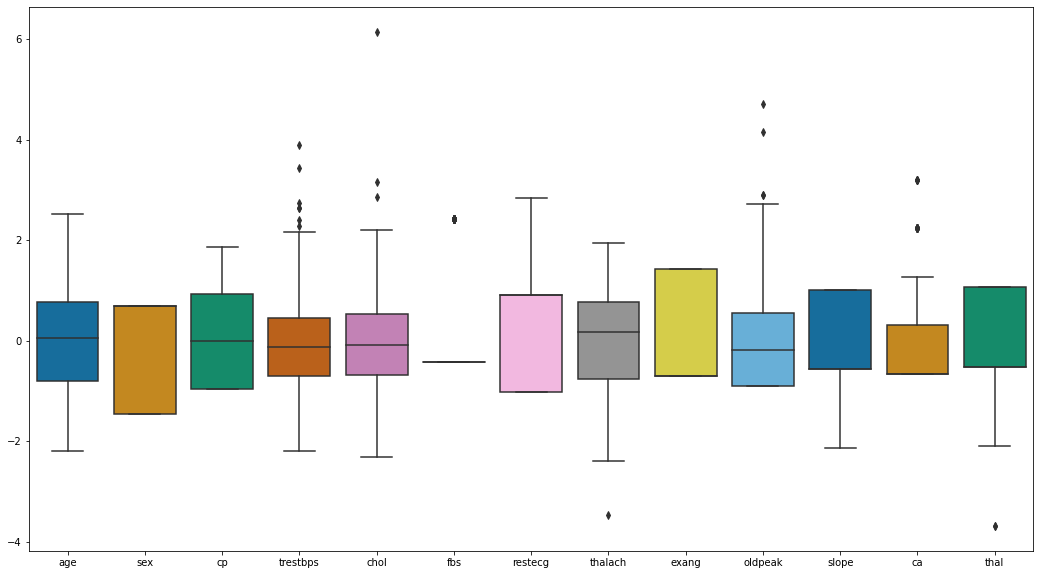

In [6]:
plt.figure(figsize=(18, 10))
sns.boxplot(data=x_train, palette="colorblind")
plt.show()

In [7]:
model = nn.Sequential(
    nn.Linear(INPUT_DIM, MY_HIDDEN),
    nn.Tanh(),
    nn.Linear(MY_HIDDEN, MY_HIDDEN),
    nn.Tanh(),
    nn.Linear(MY_HIDDEN, 1),
    nn.Sigmoid()
)

In [8]:
print('dnn 요약')
print(model)

# 총 파라미터 수 계산
total = sum(p.numel() for p in model.parameters())
print(f'총 파라미터 수: {total}')

dnn 요약
Sequential(
  (0): Linear(in_features=13, out_features=1000, bias=True)
  (1): Tanh()
  (2): Linear(in_features=1000, out_features=1000, bias=True)
  (3): Tanh()
  (4): Linear(in_features=1000, out_features=1, bias=True)
  (5): Sigmoid()
)
총 파라미터 수: 1016001


In [9]:
# 최적화 함수, 손실 함수 지정

optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
criterion = nn.MSELoss()

# 학습용 데이터 전환
# pandas dataframe에서 pytorch 텐서로 

x_train = torch.tensor(x_train.values).float()
y_train = torch.tensor(y_train.values).float()

In [10]:
# dnn 학습

for epoch in range(MY_EPOCH):
    output = model(x_train)

    # 출력값 차원을 (212, 1)에서 (212,)로 조정
    output = torch.squeeze(output)

    # 손실값 계산
    loss = criterion(output, y_train)

    if (epoch % 10 == 0):
        print(f"epoch : {epoch}")
        print(f'손실 : {loss.item()}')

    # 역전파 알고리즘으로 가중치 보정

    optimizer.zero_grad() # 기울기 구하기에 앞서 기울기를 0으로 초기화
    loss.backward() # 역전파 알고리즘으로 역방향 계산
    optimizer.step() # 가중치를 업데이트



epoch : 0
손실 : 0.2503094971179962
epoch : 10
손실 : 0.196427583694458
epoch : 20
손실 : 0.1679137647151947
epoch : 30
손실 : 0.15208637714385986
epoch : 40
손실 : 0.1424744576215744
epoch : 50
손실 : 0.13614867627620697
epoch : 60
손실 : 0.13171187043190002
epoch : 70
손실 : 0.1284419149160385
epoch : 80
손실 : 0.1259365975856781
epoch : 90
손실 : 0.123957060277462


In [11]:
# 인공 신경망 평가
# 평가용 데이터 전환
x_test = torch.tensor(x_test.values).float()


# 가중치 관련 계산 불필요
with torch.no_grad():
    pred = model(x_test)

print(pred.flatten())

tensor([0.8019, 0.0738, 0.8824, 0.8856, 0.8962, 0.5889, 0.8494, 0.0592, 0.6951,
        0.1998, 0.0631, 0.1767, 0.1259, 0.6573, 0.8971, 0.1003, 0.1968, 0.2837,
        0.1482, 0.6173, 0.2984, 0.2874, 0.7120, 0.2718, 0.7211, 0.9227, 0.6073,
        0.3325, 0.8761, 0.8498, 0.1510, 0.7844, 0.6757, 0.3610, 0.7023, 0.8523,
        0.0802, 0.5406, 0.7986, 0.5303, 0.2374, 0.8013, 0.4244, 0.6362, 0.1507,
        0.7056, 0.5480, 0.8560, 0.4934, 0.4093, 0.6144, 0.2398, 0.8484, 0.7630,
        0.2741, 0.9188, 0.9255, 0.7314, 0.7419, 0.7944, 0.6543, 0.7120, 0.8465,
        0.1409, 0.9557, 0.3071, 0.9331, 0.6005, 0.7306, 0.7313, 0.2743, 0.9149,
        0.0569, 0.7058, 0.8009, 0.0636, 0.5599, 0.0727, 0.6476, 0.1272, 0.9023,
        0.9272, 0.0598, 0.8197, 0.8887, 0.9159, 0.1137, 0.7295, 0.1066, 0.6387,
        0.2537])


In [12]:
# 추측 결과 텐서를 numpy로 전환
pred = pred.numpy()

# 확률을 이진수로 전환 후, f1 점수 계산
pred = (pred > 0.5)
print(pred.flatten())

f1 = f1_score(y_test, pred)
print(f'최종 정확도(f1 score) : {f1}')

[ True False  True  True  True  True  True False  True False False False
 False  True  True False False False False  True False False  True False
  True  True  True False  True  True False  True  True False  True  True
 False  True  True  True False  True False  True False  True  True  True
 False False  True False  True  True False  True  True  True  True  True
  True  True  True False  True False  True  True  True  True False  True
 False  True  True False  True False  True False  True  True False  True
  True  True False  True False  True False]
최종 정확도(f1 score) : 0.8349514563106796
